In [35]:
import os
import sys
import json
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

from src.agent import DDPG_Hedger
from src.agent import *
from src.network import MLP
import src.simulation
from src.env import StockTradingEnv

import matplotlib.pyplot as plt


In [ ]:
version = "v7"
DDPG_Hedger.load(MLP,version)


In [28]:
BATCH_SIZE = 32

with open("model/hypparams.json", "r") as file:
    hyp_params = json.load(file)
# hyp_params = {"critic_lr": -5.491386792760453, "actor_lr": -5.80149679060888}
env = StockTradingEnv(reset_path=False, data_type="mixed")

N = env.asset_price.shape[1]

actor_lr = 10 ** hyp_params["actor_lr"]
critic_lr = 10 ** hyp_params["critic_lr"]

# actor_lr, critic_lr = 10**-4, 10**-4
nState, nAction = env.observation_space.shape[0], env.action_space.shape[0]  # 3, 1

# we use hidden layer size of 32, 64 as the author used.
actor = MLP(nState, 32, nAction, "Sigmoid")
qnet_1 = MLP(nState + nAction, 32, nAction, "")
qnet_2 = MLP(nState + nAction, 32, nAction, "")
agent = DDPG_Hedger(actor, qnet_1, qnet_2, actor_lr, critic_lr, 1, BATCH_SIZE)

noise_std = 1

In [37]:
ep_tot_reward = 0
rewards = np.zeros(N)
state = env.reset()  # replace with test -------
actions = []
for i in range(N-1):
    # take action given state
    action = agent.act(state, noise_std) 
    # take next step of the environment
    next_state, reward, done = env.step(action)  # replace with test -------
    # record interaction between environment and the agent
    agent.store(state, action, reward, next_state, done)
    rewards[i] = reward
    ep_tot_reward += reward
    state = next_state

    S_sabr, p_sabr, delta_sabr, bl_delta_sabr, trading_sabr, holding_sabr, trading_sabr_bartlett, holding_sabr_bartlett = hedgingStrategy(method,notional, n, T, dt, S0, mu, r, q, sigma, days, freq, rho, ds, v)
    holding_sabr





In [29]:
N

60

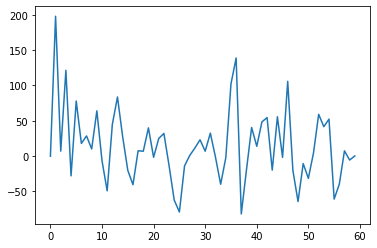

In [36]:
plt.plot(rewards)

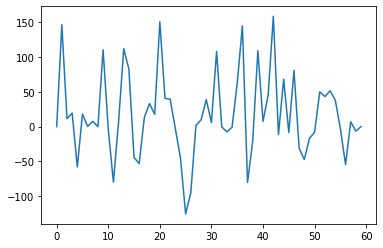

In [38]:
plt.plot(rewards)